In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [4]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [5]:
# 금속 농도 열 추출 (단위가 ng/m3인 열)
metal_columns = df.columns[df.columns.str.endswith('(ng/m3)')]

# 날짜 추출
df['Date'] = pd.to_datetime(df['Pump-Begin']).dt.date

In [6]:
# 날짜별 금속 농도 합계 계산
daily_metal_sum = df.groupby('Date')[metal_columns].sum()

print(daily_metal_sum.head())

            Al(ng/m3)  Si(ng/m3)   S(ng/m3)  K(ng/m3)  Ca(ng/m3)  Ti(ng/m3)  \
Date                                                                          
2025-01-10    6467.68    9129.44   26630.57   3169.75    1549.33       5.44   
2025-01-11   10849.28   17949.95   87858.83   5597.79    2694.73       2.82   
2025-01-12   11107.79   19625.39   93425.85   6384.60    3029.76       8.59   
2025-01-13   13024.65   26825.96  109464.10   6752.01    3251.99      19.30   
2025-01-14   17458.61   50810.00  132868.98   9171.90    4928.67      83.86   

            V(ng/m3)  Cr(ng/m3)  Mn(ng/m3)  Fe(ng/m3)  ...  Cd(ng/m3)  \
Date                                                   ...              
2025-01-10     50.53      73.30     113.26    1195.49  ...    3858.23   
2025-01-11    103.57     115.42     208.62    2878.73  ...    6935.55   
2025-01-12    100.87     114.01     210.77    2643.23  ...    6857.37   
2025-01-13     82.22     100.23     220.69    3030.90  ...    6294.95   
2025-01-

In [7]:
# 날짜별 전체 금속 농도 총합 계산 (이상치 기준용)
total_sum = daily_metal_sum.sum(axis=1)

print(total_sum.head())

Date
2025-01-10     60980.76
2025-01-11    149442.19
2025-01-12    157006.71
2025-01-13    180696.59
2025-01-14    236255.37
dtype: float64


In [8]:
# 이상치 판정: 전체 금속 농도 총합 기준 (평균보다 1.5배 이상인 경우)
threshold_total = total_sum.mean() + 1.5 * total_sum.std()
outlier_dates = total_sum[total_sum > threshold_total].index.tolist()

print(outlier_dates)

[datetime.date(2025, 1, 21), datetime.date(2025, 1, 23)]


In [9]:
# 일별 금속 농도 비율 (%) 계산 (그래프용)
combined_days_sorted = daily_metal_sum.sort_index() # 날짜 정렬
combined_percentage = combined_days_sorted.div(combined_days_sorted.sum(axis=1), axis=0) * 100

# 결과 출력
print(combined_percentage.head())

            Al(ng/m3)  Si(ng/m3)   S(ng/m3)  K(ng/m3)  Ca(ng/m3)  Ti(ng/m3)  \
Date                                                                          
2025-01-10  10.606099  14.971017  43.670446  5.197951   2.540687   0.008921   
2025-01-11   7.259851  12.011300  58.791182  3.745790   1.803192   0.001887   
2025-01-12   7.074723  12.499714  59.504368  4.066450   1.929701   0.005471   
2025-01-13   7.208022  14.845858  60.578952  3.736656   1.799696   0.010681   
2025-01-14   7.389720  21.506389  56.239560  3.882197   2.086162   0.035495   

            V(ng/m3)  Cr(ng/m3)  Mn(ng/m3)  Fe(ng/m3)  ...  Cd(ng/m3)  \
Date                                                   ...              
2025-01-10  0.082862   0.120202   0.185731   1.960438  ...   6.326963   
2025-01-11  0.069304   0.077234   0.139599   1.926317  ...   4.640958   
2025-01-12  0.064246   0.072615   0.134243   1.683514  ...   4.367565   
2025-01-13  0.045502   0.055469   0.122133   1.677342  ...   3.483713   
2025-01-

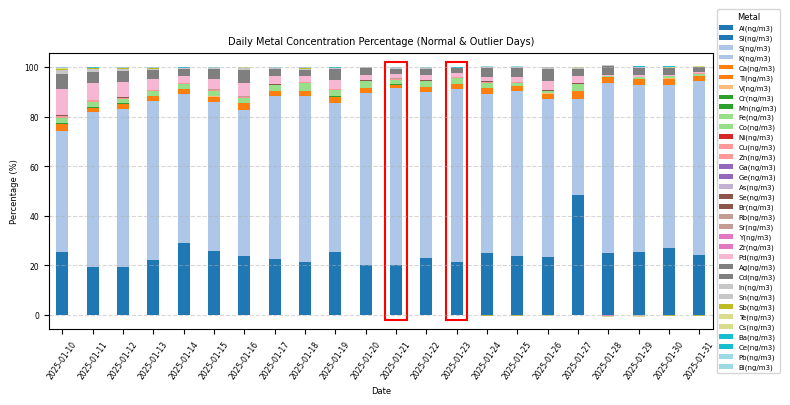

In [14]:
# 날짜 리스트
dates = combined_percentage.index.tolist()

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 4))
combined_percentage.plot(kind='bar',
                         stacked=True,
                         ax=ax,
                         width=0.4,
                         colormap='tab20')

# 이상치 날짜 표시
for i, date in enumerate(dates):
    if date in outlier_dates:
        rect = patches.Rectangle((i - 0.35, -2), # 박스 시작 위치
                                 0.7, # 박스 가로 길이
                                 104, # 박스 높이
                                 linewidth=1.5, # 선 굵기
                                 edgecolor='red',
                                 facecolor='none')
        ax.add_patch(rect) # 도형 표시

# 그래프 기본 설정
plt.title("Daily Metal Concentration Percentage (Normal & Outlier Days)", fontsize=7)
plt.xlabel("Date", fontsize=6)
plt.ylabel("Percentage (%)", fontsize=6)
plt.xticks(rotation=55, fontsize=5.5)
plt.yticks(fontsize=5.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 범례 설정
plt.legend(loc='center left',
           bbox_to_anchor=(1.0, 0.5),
           fontsize=5,
           title='Metal',
           title_fontsize=6)

# 레이아웃 자동 조절
plt.tight_layout()

# 결과 출력
plt.show()